# HMM analysis

Here we will construct and analyze HMM models retrieved from MSAs. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.

## 1. Load the data

We are working only with the disordered regions, thus we should keep only the related information.


In [1]:
# Importing the libraries and functions
from functions import *

In [2]:
# Obtain the information about one Uniprot query ID
%store -r id_dis i
id_dis = id_dis
i = i
curated_disprot = pd.read_csv("curated_disprot.csv")
curated_query = curated_disprot[curated_disprot['acc'] == id_dis]

print(f"The number of disordered regions in the {id_dis} protein: {len(curated_query)}")
curated_query

The number of disordered regions in the Q9H832 protein: 2


,acc,evidence,feature,source,start,end,length,region
872,Q9H832,curated,disorder,disprot,1,99,99,Q9H832_1-99
873,Q9H832,curated,disorder,disprot,327,354,28,Q9H832_327-354


## 2. hmmsearch results analysis

After performing `hmmsearch` against RP 15% and RP 75%, we retrieve the dataframe `hmmsearch_results` with the statistics.

In [3]:
# # Retrieve the dataframe with the hmmsearch results RP 15%
# %store -r hmmsearch_results_rp_15
# print(f"Number of hmmsearch hits against RP 15% for the {i} disordered region of the {id_dis} protein:", len(hmmsearch_results_rp_15))
# hmmsearch_results_rp_15.head()

In [4]:
# # Retrieve the dataframe with the hmmsearch results RP 75%
# %store -r hmmsearch_results_rp_75
# print(f"Number of hmmsearch hits against RP 75% for the {i} disordered region of the {id_dis} protein:", len(hmmsearch_results_rp_75))
# hmmsearch_results_rp_75.head()

## 3. HMM and Pfam comparison
### 3.1 One MSA

We took the results of `hmmsearch` and performed a search against Interpro database. Thus we obtained the Pfam domains corresponding to the results from `hmmsearch`.

In [9]:
# Create a dataframe of Pfam regions (RP 15%) - for one MSA
pfam_overlap_rp_15 = pd.read_csv(f"results/pfam/pfam_overlap/rp_15/pfam_rp_15_{id_dis}_{i}.csv")
print(f"The number of regions for the {i} disordered region of the {id_dis} protein in Interpro (RP 15%):", len(pfam_overlap_rp_15))
print("The retrieved Pfam domains:", list(set(pfam_overlap_rp_15['pfam_id'])))
pfam_overlap_rp_15.head(15)

The number of regions for the 1 disordered region of the Q9H832 protein in Interpro (RP 15%): 6
The retrieved Pfam domains: ['PF00179']


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overlap_pfam_%,overlap_hmm_%,overlap_pfam_len,overlap_hmm_len
0,A0A2K5VU74,PF00179,IPR000608,90,213,124,1,86,86,10.1,86.87,10,86
1,A0A4Z2GIF1,PF00179,IPR000608,133,259,127,41,129,89,0.0,59.60,-33,59
2,A0A7N9CX17,PF00179,IPR000608,103,226,124,1,99,99,0.0,100.00,-3,99
3,Q3B7D1,PF00179,IPR000608,105,228,124,1,101,101,0.0,100.00,-5,99
4,Q3UE37,PF00179,IPR000608,105,228,124,1,101,101,0.0,100.00,-5,99
5,Q9H832,PF00179,IPR000608,103,226,124,1,99,99,0.0,100.00,-3,99


In [10]:
# Non overlapping UniProt IDs (RP 15%)
uniprot_ids_rp_15 = pfam_overlap_rp_15['uniprot_id'].unique()
uniprot_ids_rp_15_no_overlap = pfam_overlap_rp_15[pfam_overlap_rp_15['overlap_pfam_%'] == 0]['uniprot_id'].unique()
# uniprot_ids_rp_15_no_overlap = np.setdiff1d(uniprot_ids_rp_15_no_overlap, uniprot_ids_rp_15)

print(f"The number of found UniProt IDs for {id_dis}_{i}:", len(uniprot_ids_rp_15))
print("The number of UniProt IDs non overlapping DisProt region:", len(uniprot_ids_rp_15_no_overlap))
print("The ratio of non overlapping regions:", len(uniprot_ids_rp_15_no_overlap)/len(uniprot_ids_rp_15))

The number of found UniProt IDs for Q9H832_1: 6
The number of UniProt IDs non overlapping DisProt region: 5
The ratio of non overlapping regions: 0.8333333333333334


In [11]:
# Non overlapping Pfam IDs (RP 15%)
pfam_domains_rp_15 = pfam_overlap_rp_15['pfam_id'].unique()
pfam_domains_rp_15_no_overlap = pfam_overlap_rp_15[pfam_overlap_rp_15['overlap_pfam_%'] == 0]['pfam_id'].unique()
pfam_domains_rp_15_no_overlap = np.setdiff1d(pfam_domains_rp_15_no_overlap, pfam_domains_rp_15)

print(f"The number of found Pfam domains for {id_dis}_{i}:", len(pfam_domains_rp_15))
print("The number of Pfam domains non overlapping DisProt region:", len(pfam_domains_rp_15_no_overlap))
print("The ratio of non overlapping regions:", len(pfam_domains_rp_15_no_overlap)/len(pfam_domains_rp_15))

The number of found Pfam domains for Q9H832_1: 1
The number of Pfam domains non overlapping DisProt region: 0
The ratio of non overlapping regions: 0.0


In [12]:
# Create a dataframe of Pfam regions (RP 75%) - for one MSA
pfam_overlap_rp_75 = pd.read_csv(f"results/pfam/pfam_overlap/rp_75/pfam_rp_75_{id_dis}_{i}.csv")
print(f"The number of regions for the {i} disordered region of the {id_dis} protein in Interpro (RP 75%):", len(pfam_overlap_rp_75))
print("The retrieved Pfam domains:", list(set(pfam_overlap_rp_75['pfam_id'])))
pfam_overlap_rp_75.head()

The number of regions for the 1 disordered region of the Q9H832 protein in Interpro (RP 75%): 205
The retrieved Pfam domains: ['PF00179', 'PF13962']


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overlap_pfam_%,overlap_hmm_%,overlap_pfam_len,overlap_hmm_len
0,A0A060WJZ8,PF00179,IPR000608,143,266,124,45,139,95,0.0,55.56,-43,55
1,A0A096P442,PF00179,IPR000608,103,226,124,1,99,99,0.0,100.00,-3,99
2,A0A0D3HLA7,PF13962,IPR026961,441,546,106,183,257,75,0.0,0.00,-341,-83
3,A0A0D3HLA7,PF13962,IPR026961,980,1085,106,183,257,75,0.0,0.00,-880,-83
4,A0A0D3HLA7,PF13962,IPR026961,1591,1696,106,183,257,75,0.0,0.00,-1491,-83


In [13]:
# Non overlapping UniProt IDs (RP 75%)
uniprot_ids_rp_75 = pfam_overlap_rp_75['uniprot_id'].unique()
uniprot_ids_rp_75_no_overlap = pfam_overlap_rp_75[pfam_overlap_rp_75['overlap_pfam_%'] == 0]['uniprot_id'].unique()
uniprot_ids_rp_75_no_overlap = np.setdiff1d(uniprot_ids_rp_75_no_overlap, uniprot_ids_rp_75)

print(f"The number of found UniProt IDs for {id_dis}_{i}:", len(uniprot_ids_rp_75))
print("The number of UniProt IDs non overlapping DisProt region:", len(uniprot_ids_rp_75_no_overlap))
print("The ratio of non overlapping regions:", len(uniprot_ids_rp_75_no_overlap)/len(uniprot_ids_rp_75))

The number of found UniProt IDs for Q9H832_1: 203
The number of UniProt IDs non overlapping DisProt region: 0
The ratio of non overlapping regions: 0.0


In [14]:
# Non overlapping Pfam IDs (RP 75%)
pfam_domains_rp_75 = pfam_overlap_rp_75['pfam_id'].unique()
pfam_domains_rp_75_no_overlap = pfam_overlap_rp_75[pfam_overlap_rp_75['overlap_pfam_%'] == 0]['pfam_id'].unique()
pfam_domains_rp_75_no_overlap = np.setdiff1d(pfam_domains_rp_75_no_overlap, pfam_domains_rp_75)

print(f"The number of found Pfam domains for {id_dis}_{i}:", len(pfam_domains_rp_75))
print("The number of Pfam domains non overlapping DisProt region:", len(pfam_domains_rp_75_no_overlap))
print("The ratio of non overlapping regions:", len(pfam_domains_rp_75_no_overlap)/len(pfam_domains_rp_75))

The number of found Pfam domains for Q9H832_1: 2
The number of Pfam domains non overlapping DisProt region: 0
The ratio of non overlapping regions: 0.0


Then we compare the HMM and Pfam model length with the Disprot.

In [15]:
# Get the length of the disordered region
length = curated_query['length'].iloc[i-1]
print(f"The length of the {i} region of the {id_dis}:", length)

The length of the 1 region of the Q9H832: 99


In [16]:
# Plot overlaps with Pfam and HMM
def plot_overlapping_proteins(pfam_overlap, curated_query, id_dis, i):
    unique_uniprot_ids = pfam_overlap['uniprot_id'].unique()
    
    y_axis_range = range(len(unique_uniprot_ids))

    if len(unique_uniprot_ids) == 0:
        print("No overlapping regions to plot.")
        return

    # Create two subplots, one for Pfam and one for HMM regions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 0.5 * len(unique_uniprot_ids)))

    # Plot the Pfam regions in the first subplot
    if len(curated_query) == 1:
        ax1.hlines(pfam_overlap['uniprot_id'], curated_query['start'], curated_query['end'], linewidth=10, color='lightgreen', label='Disprot Region')
#         ax1.text(curated_query['start'], 0, f'Start: {curated_query["start"].values[0]}', va='bottom', fontsize=8)
#         ax1.text(curated_query['end'], 0, f'End: {curated_query["end"].values[0]}', va='bottom', fontsize=8)        
    else:
        ax1.hlines(pfam_overlap['uniprot_id'], curated_query['start'].iloc[i], curated_query['end'].iloc[i], linewidth=10, color='lightgreen', label='Disprot Region')
#         ax1.text(curated_query['start'].iloc[i], 0, f'Start: {curated_query["start"].iloc[i]}', va='bottom', fontsize=8)
#         ax1.text(curated_query['end'].iloc[i], 0, f'End: {curated_query["end"].iloc[i]}', va='bottom', fontsize=8)
    ax1.hlines(pfam_overlap['uniprot_id'], pfam_overlap['start_pfam'], pfam_overlap['end_pfam'], linewidth=10, color='lightblue', label='Pfam Region')    
    ax1.set_yticks(pfam_overlap['uniprot_id'])
    ax1.set_yticklabels(pfam_overlap['uniprot_id'])
    ax1.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    for _, row in pfam_overlap.iterrows():
        x_pos = (row['start_pfam'] + row['end_pfam']) / 2
        y_pos = row['uniprot_id']
        ax1.annotate(row['pfam_id'], (x_pos, y_pos), ha='center', va='center', fontsize=8)
    ax1.set_title(f'Pfam-DisProt')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('UniProt ID')
    ax1.grid(True)

    # Plot the HMM regions in the second subplot
    if len(curated_query) == 1:
        ax2.hlines(pfam_overlap['uniprot_id'], curated_query['start'], curated_query['end'], linewidth=10, color='lightgreen', label='Disprot Region')
    else:
        ax2.hlines(pfam_overlap['uniprot_id'], curated_query['start'].iloc[i], curated_query['end'].iloc[i], linewidth=10, color='lightgreen', label='Disprot Region')
    ax2.hlines(pfam_overlap['uniprot_id'], pfam_overlap['ali_from'], pfam_overlap['ali_to'], linewidth=10, color='lightpink', label='HMM Region')    
    ax2.set_yticks(pfam_overlap['uniprot_id'])
    ax2.set_yticklabels(pfam_overlap['uniprot_id'])
    ax2.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    ax2.set_title(f'HMM-DisProt')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('UniProt ID')
    ax2.grid(True)
    
    plt.suptitle(f'Overlaps for the {id_dis}_{i+1}')

    plt.tight_layout()
    plt.show()

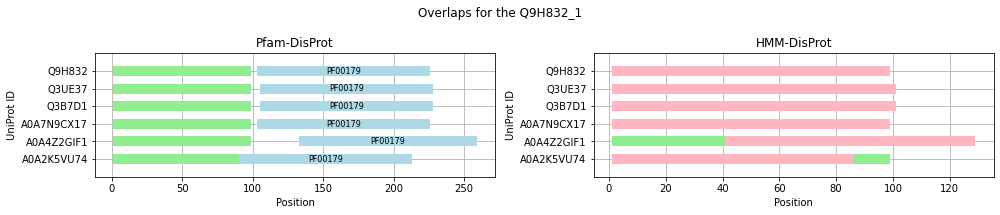

In [17]:
# Plot overlapping proteins (RP 15%)
plot_overlapping_proteins(pfam_overlap_rp_15, curated_query, id_dis, i-1)

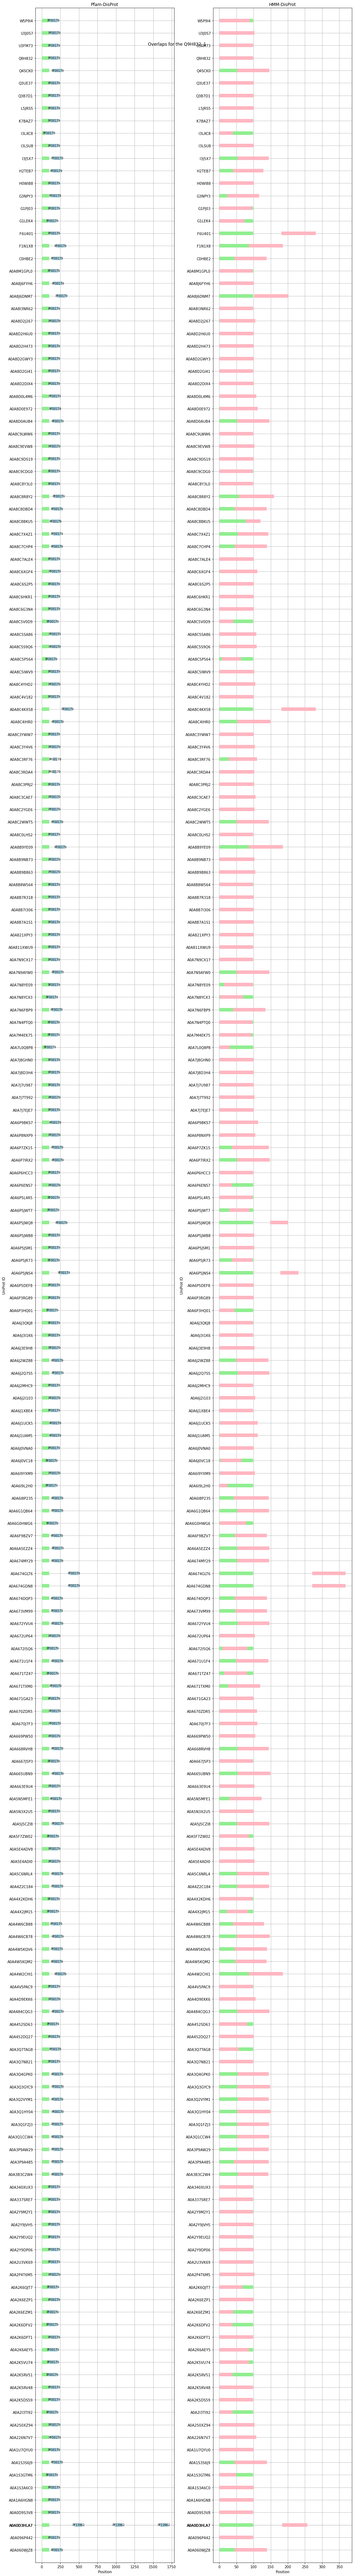

In [18]:
# Plot overlapping proteins (RP 75%)
plot_overlapping_proteins(pfam_overlap_rp_75, curated_query, id_dis, i-1)

In [19]:
# Plot overlaps with Pfam and HMM
def plot_overlapping_domains(pfam_overlap, curated_query, id_dis, i):
    unique_pfam_ids = pfam_overlap['pfam_id'].unique()
    
    y_axis_range = range(len(unique_pfam_ids))

    if len(unique_pfam_ids) == 0:
        print("No overlapping regions to plot.")
        return

    # Create two subplots, one for Pfam and one for HMM regions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 0.5 * len(unique_pfam_ids)))

    # Plot the Pfam regions in the first subplot
    if len(curated_query) == 1:
        ax1.hlines(pfam_overlap['pfam_id'], curated_query['start'], curated_query['end'], linewidth=10, color='lightgreen', label='Disprot Region')
    else:
        ax1.hlines(pfam_overlap['pfam_id'], curated_query['start'].iloc[i], curated_query['end'].iloc[i], linewidth=10, color='lightgreen', label='Disprot Region')
    ax1.hlines(pfam_overlap['pfam_id'], pfam_overlap['start_pfam'], pfam_overlap['end_pfam'], linewidth=10, color='lightblue', label='Pfam Region')    
    ax1.set_yticks(pfam_overlap['pfam_id'])
    ax1.set_yticklabels(pfam_overlap['pfam_id'])
    ax1.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    for _, row in pfam_overlap.iterrows():
        x_pos = (row['start_pfam'] + row['end_pfam']) / 2
        y_pos = row['pfam_id']
        ax1.annotate(row['pfam_id'], (x_pos, y_pos), ha='center', va='center', fontsize=8)
    ax1.set_title(f'Pfam-DisProt')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Pfam ID')
    ax1.grid(True)

    # Plot the HMM regions in the second subplot
    if len(curated_query) == 1:
        ax2.hlines(pfam_overlap['pfam_id'], curated_query['start'], curated_query['end'], linewidth=10, color='lightgreen', label='Disprot Region')
    else:
        ax2.hlines(pfam_overlap['pfam_id'], curated_query['start'].iloc[i], curated_query['end'].iloc[i], linewidth=10, color='lightgreen', label='Disprot Region')
    ax2.hlines(pfam_overlap['pfam_id'], pfam_overlap['ali_from'], pfam_overlap['ali_to'], linewidth=10, color='lightpink', label='HMM Region')    
    ax2.set_yticks(pfam_overlap['pfam_id'])
    ax2.set_yticklabels(pfam_overlap['pfam_id'])
    ax2.set_ylim(min(y_axis_range) - 1, max(y_axis_range) + 1)
    ax2.set_title(f'HMM-DisProt')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Pfam ID')
    ax2.grid(True)
    
    plt.suptitle(f'Overlaps for the {id_dis}_{i+1}')

    plt.tight_layout()
    plt.show()

/var/folders/lp/74jh9r6s4zx_dyg2_78l67dw0000gn/T/ipykernel_14347/2305618737.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


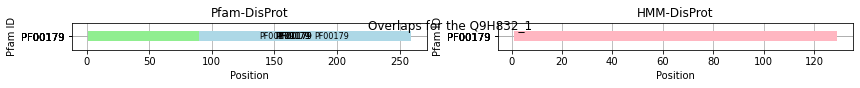

In [20]:
# Plot overlapping proteins (RP 15%)
plot_overlapping_domains(pfam_overlap_rp_15, curated_query, id_dis, i-1)

/var/folders/lp/74jh9r6s4zx_dyg2_78l67dw0000gn/T/ipykernel_14347/2305618737.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


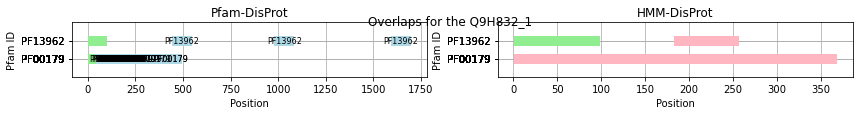

In [21]:
# Plot overlapping proteins (RP 75%)
plot_overlapping_domains(pfam_overlap_rp_75, curated_query, id_dis, i-1)

### 3.2 Overall analysis
### 3.2.1 RP 15%

In [5]:
# Load the pfam_hmm_rp_15 dataframe
pfam_hmm_rp_15 = pd.read_csv('results/pfam/pfam_hmm_rp_15.csv')
print("The number of hmmsearch results for RP 15%:", len(pfam_hmm_rp_15))
pfam_hmm_rp_15

The number of hmmsearch results for RP 15%: 1655


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overlap_pfam_%,overlap_hmm_%,overlap_pfam_len,overlap_hmm_len
0,A0A2K5X283,PF16959,IPR031588,617,770,154,769,805,37,5.41,100.00,2,37
1,A0A2K6SBD4,PF16959,IPR031588,618,770,153,769,805,37,5.41,100.00,2,37
2,A0A6J7ZVR2,PF00754,IPR000421,16,86,71,173,189,17,0.00,0.00,-682,-579
3,A0A6J7ZVR2,PF00754,IPR000421,149,255,107,173,189,17,0.00,0.00,-513,-579
4,A0A6J7ZVR2,PF00754,IPR000421,294,400,107,173,189,17,0.00,0.00,-368,-579
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,F6Q5G6,PF17913,IPR041388,22,63,42,404,425,22,0.00,77.27,-335,17
1651,Q8IW19,PF10283,IPR019406,376,401,26,399,420,22,13.64,100.00,3,22
1652,Q8IW19,PF10283,IPR019406,418,442,25,399,420,22,13.64,100.00,3,22
1653,Q8IW19,PF17913,IPR041388,17,64,48,399,420,22,0.00,100.00,-334,22


In [6]:
# Load the pfam_hmm_rp_75 dataframe
pfam_hmm_rp_75 = pd.read_csv('results/pfam/pfam_hmm_rp_75.csv')
print("The number of hmmsearch results for RP 15%:", len(pfam_hmm_rp_75))
pfam_hmm_rp_75

The number of hmmsearch results for RP 15%: 23010


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,overlap_pfam_%,overlap_hmm_%,overlap_pfam_len,overlap_hmm_len
0,A0A060VYC8,PF07686,IPR013106,21,101,81,15,110,96,80.21,89.58,77,86
1,A0A060VYC8,PF08205,IPR013162,119,197,79,15,110,96,2.08,89.58,2,86
2,A0A060W1A4,PF07686,IPR013106,23,99,77,18,110,93,78.12,89.58,75,86
3,A0A060W1A4,PF08205,IPR013162,118,195,78,18,110,93,3.12,89.58,3,86
4,A0A060WNT4,PF07686,IPR013106,27,108,82,21,116,96,85.42,95.83,82,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,A0A6J3QZB9,PF12026,IPR021901,372,475,104,712,816,105,0.00,0.00,-266,-606
23006,A0A6J3QZC4,PF14604,IPR001452,12,64,53,593,697,105,50.48,0.00,53,-487
23007,A0A6J3QZC4,PF12026,IPR021901,408,513,106,593,697,105,0.00,0.00,-302,-487
23008,A0A8J6GE45,PF14604,IPR001452,100,152,53,727,831,105,5.71,0.00,6,-621


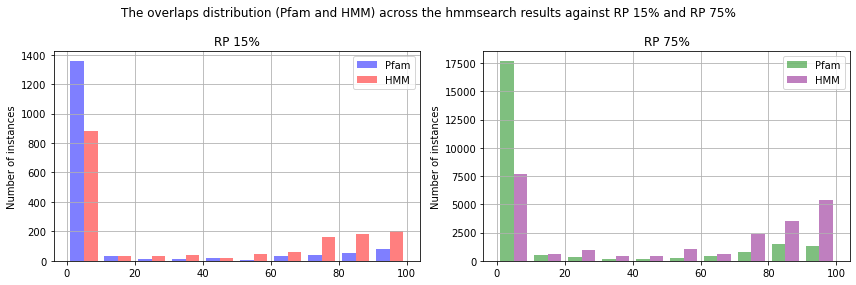

In [7]:
# Plot the histogram of overlaps % for Pfam and HMM
plt.rcParams['figure.figsize'] = [12, 4]
fig, ax = plt.subplots(1, 2, sharex=True)

ax[0].hist([pfam_hmm_rp_15['overlap_pfam_%'], pfam_hmm_rp_15['overlap_hmm_%']],
             bins=10, alpha=0.5, color=['blue', 'red'],
             label=['Pfam', 'HMM'])

ax[1].hist([pfam_hmm_rp_75['overlap_pfam_%'], pfam_hmm_rp_75['overlap_hmm_%']],
             bins=10, alpha=0.5, color=['green', 'purple'],
             label=['Pfam', 'HMM'])

ax[0].set_ylabel('Number of instances')
ax[1].set_ylabel('Number of instances')

ax[0].set_title('RP 15%')
ax[1].set_title('RP 75%')

ax[0].legend()
ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)

plt.suptitle("The overlaps distribution (Pfam and HMM) across the hmmsearch results against RP 15% and RP 75%")
plt.tight_layout()
plt.show()